In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df=df)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,StackingClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, precision_score, recall_score,  roc_auc_score,precision_recall_curve


In [2]:
df=pd.read_csv('usa_rain_prediction_dataset_2024_2025.csv')
df

Date         Location  Temperature   Humidity  Wind Speed  \
0      2024-01-01         New York    87.524795  75.655455   28.379506   
1      2024-01-02         New York    83.259325  28.712617   12.436433   
2      2024-01-03         New York    80.943050  64.740043   14.184831   
3      2024-01-04         New York    78.097552  59.738984   19.444029   
4      2024-01-05         New York    37.059963  34.766784    3.689661   
...           ...              ...          ...        ...         ...   
73095  2025-12-27  Washington D.C.    40.614393  65.099438   28.778327   
73096  2025-12-28  Washington D.C.    52.641643  30.610525   12.282890   
73097  2025-12-29  Washington D.C.    56.492591  96.740232    2.894762   
73098  2025-12-30  Washington D.C.    65.748956  63.900004   24.632400   
73099  2025-12-31  Washington D.C.    54.648609  80.812021   22.722505   

       Precipitation  Cloud Cover     Pressure  Rain Tomorrow  
0           0.000000    69.617966  1026.030278              0  
1           0.526995    41.606048   995.962065              0  
2           0.916884    77.364763   980.796739              1  
3           0.094134    52.541196   979.012163              0  
4           1.361272    85.584000  1031.790859              0  
...              ...          ...          ...            ...  
73095       0.000000    54.168514   977.083747              0  
73096       0.871000    22.068055   980.591675              0  
73097       1.191956    52.336048  1016.469174              1  
73098       0.483421    76.785280  1032.396146              1  
73099       0.151903    19.674960   974.835534              0  

[73100 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation   Cloud Cover  \
count  73100.000000  73100.000000  73100.000000   73100.000000  73100.000000   
mean      65.182270     59.875041     15.017946       0.390635     54.942807   
std       20.205793     23.066115      8.668729       0.474833     25.982487   
min       30.000766     20.000272      0.000712       0.000000     10.000856   
25%       47.678968     39.800732      7.485182       0.000000     32.318668   
50%       65.294949     59.887840     15.102495       0.196909     55.011121   
75%       82.636570     79.835990     22.551794       0.673177     77.412469   
max       99.997393     99.999025     29.999017       3.078090     99.998957   

           Pressure  Rain Tomorrow  
count  73100.000000   73100.000000  
mean    1005.176013       0.220410  
std       20.203889       0.414526  
min      970.000919       0.000000  
25%      987.697646       0.000000  
50%     1005.284188       0.000000  
75%     1022.727410       0.000000  
max     1039.999765       1.000000

In [5]:
numeric_dtypes=df.select_dtypes(include=[int, float])

In [6]:
def plot_numeric_columns(df, numeric_cols):
    for col in numeric_cols:
        plt.figure(figsize=(12, 4))

        
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Boxplot of {col}')

        plt.plot(1,2,2) 
        sns.displot(x=df[col],color='orange')
        plt.title(f'Distplot of the column {col}')
        
        plt.tight_layout()
        plt.show()
        

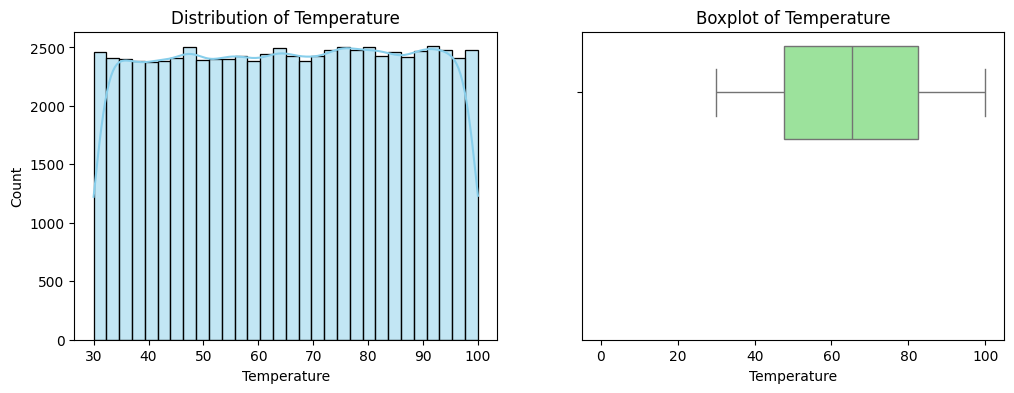

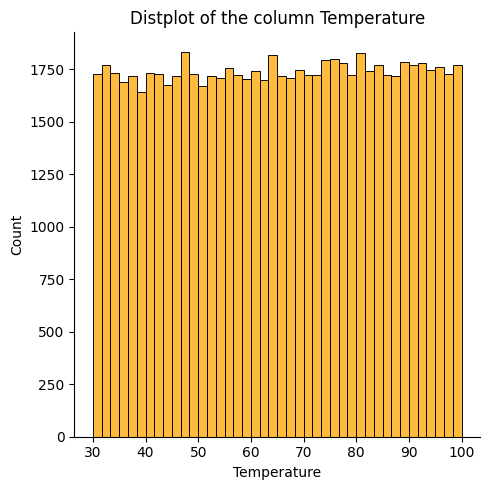

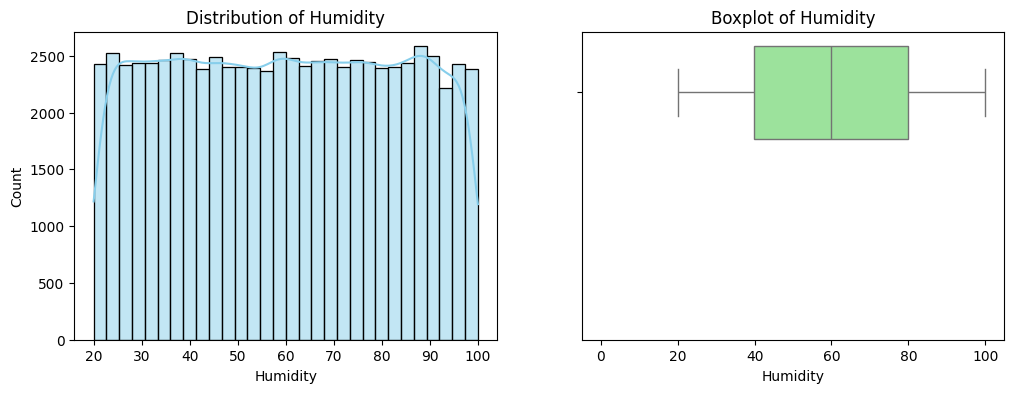

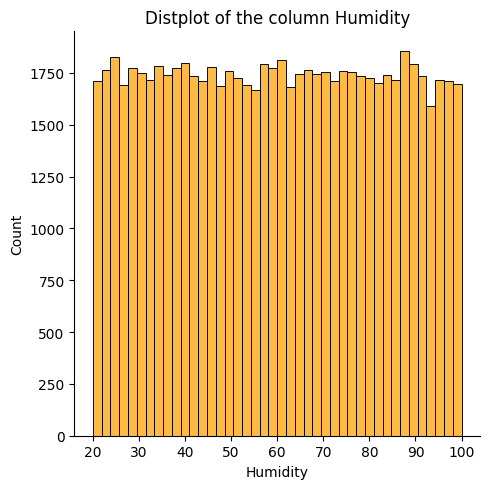

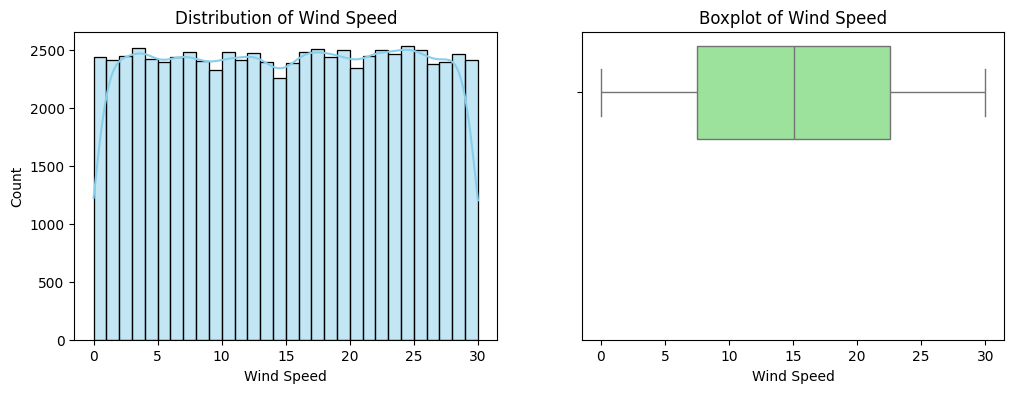

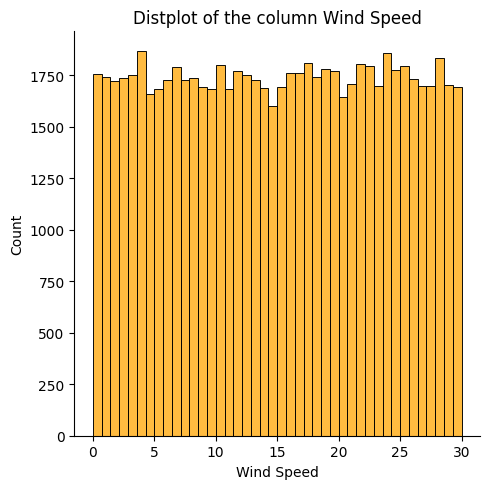

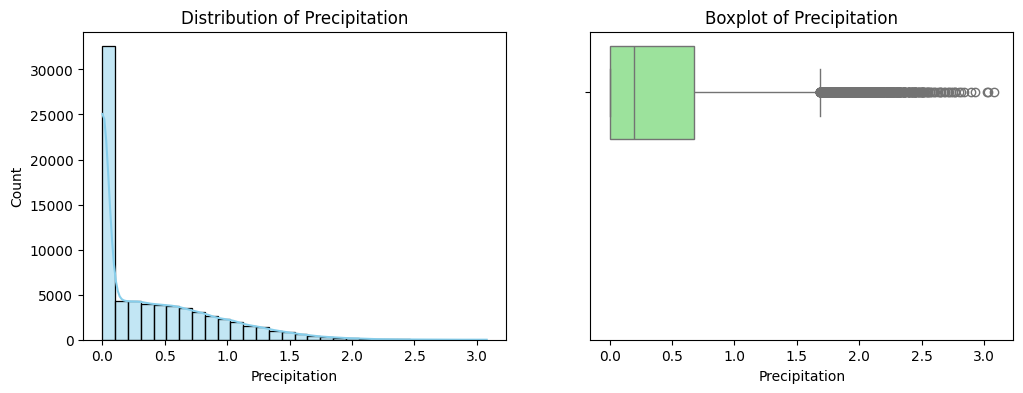

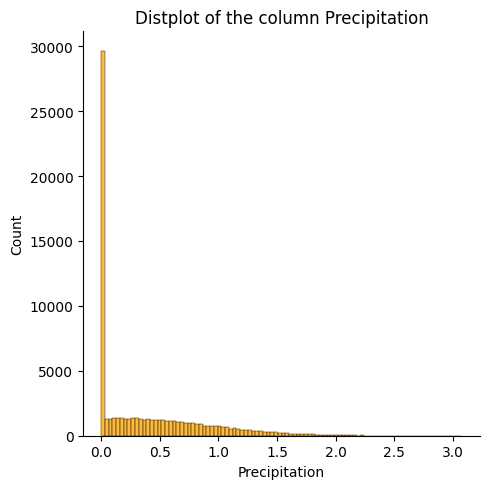

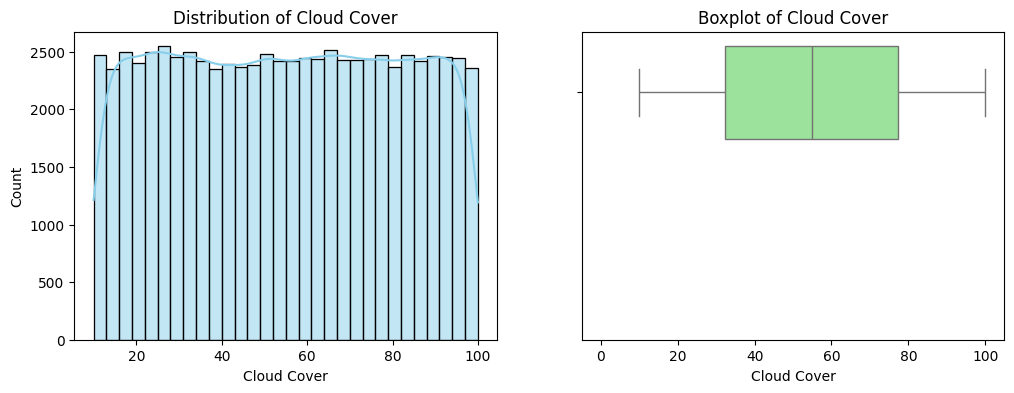

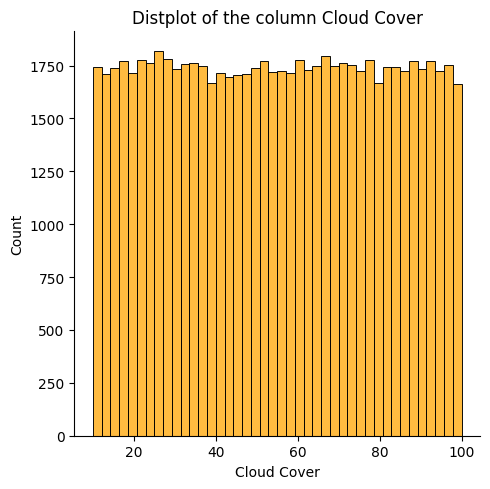

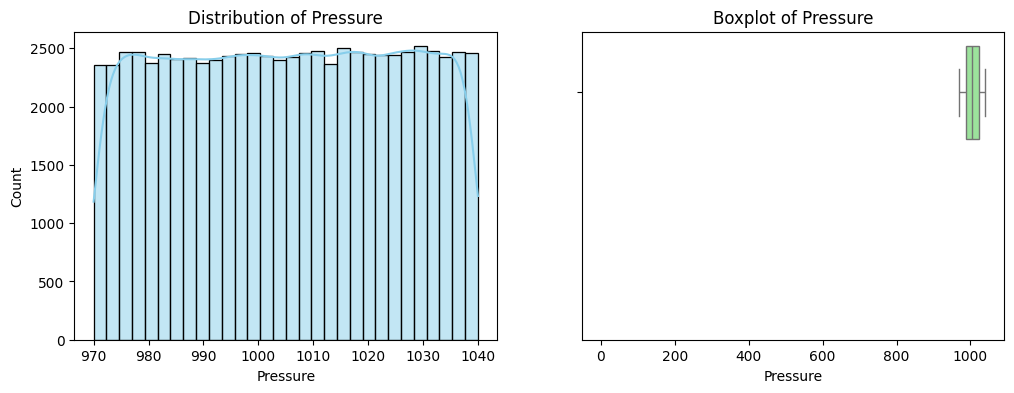

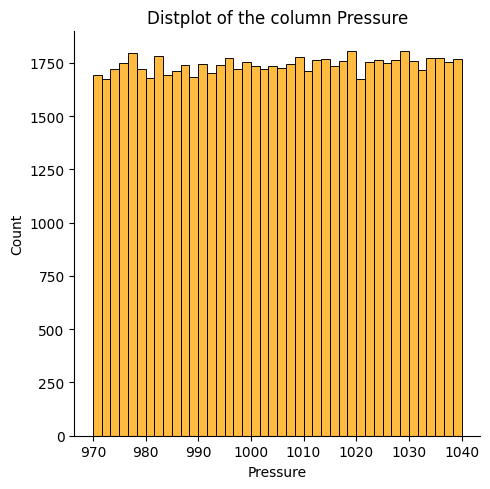

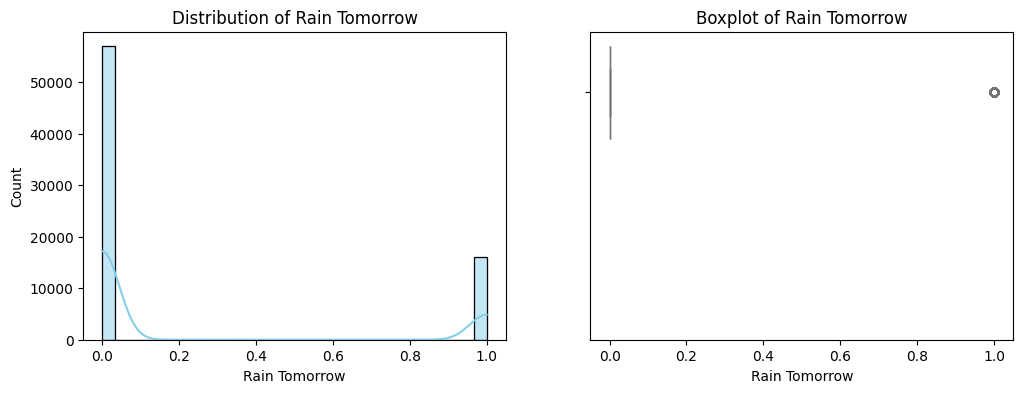

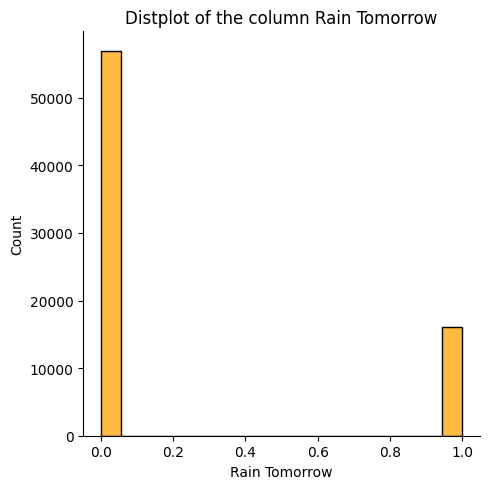

In [7]:
plot_numeric_columns(df,numeric_cols=numeric_dtypes)
# Ok so here sicne we can see that there is  no much of the outliers and the distribution for every other columns is very much normalized and in same sequence so using the standardscaler will not be as useful as that  

<Axes: >

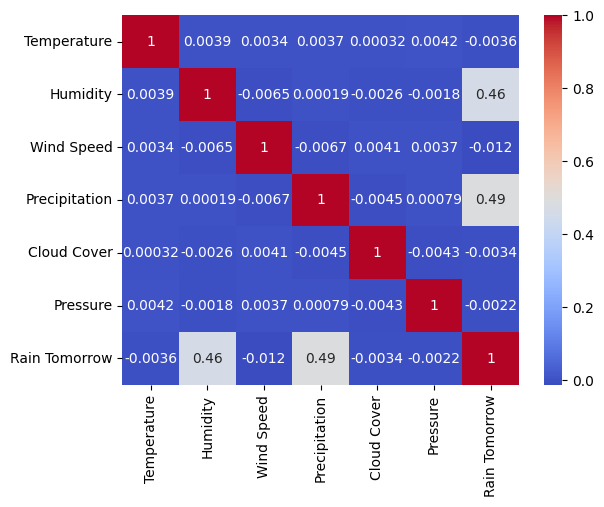

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm')
# Even though the major Y(Rain Tommrrow is based majorly on the Precipiation and Humidity we cant still dtop this cause RFC or other tress model might get overfit)

In [9]:
df.groupby('Location').sum()

Date  \
Location                                                             
Austin           2024-01-012024-01-022024-01-032024-01-042024-0...   
Charlotte        2024-01-012024-01-022024-01-032024-01-042024-0...   
Chicago          2024-01-012024-01-022024-01-032024-01-042024-0...   
Columbus         2024-01-012024-01-022024-01-032024-01-042024-0...   
Dallas           2024-01-012024-01-022024-01-032024-01-042024-0...   
Denver           2024-01-012024-01-022024-01-032024-01-042024-0...   
Fort Worth       2024-01-012024-01-022024-01-032024-01-042024-0...   
Houston          2024-01-012024-01-022024-01-032024-01-042024-0...   
Indianapolis     2024-01-012024-01-022024-01-032024-01-042024-0...   
Jacksonville     2024-01-012024-01-022024-01-032024-01-042024-0...   
Los Angeles      2024-01-012024-01-022024-01-032024-01-042024-0...   
New York         2024-01-012024-01-022024-01-032024-01-042024-0...   
Philadelphia     2024-01-012024-01-022024-01-032024-01-042024-0...   
Phoenix          2024-01-012024-01-022024-01-032024-01-042024-0...   
San Antonio      2024-01-012024-01-022024-01-032024-01-042024-0...   
San Diego        2024-01-012024-01-022024-01-032024-01-042024-0...   
San Francisco    2024-01-012024-01-022024-01-032024-01-042024-0...   
San Jose         2024-01-012024-01-022024-01-032024-01-042024-0...   
Seattle          2024-01-012024-01-022024-01-032024-01-042024-0...   
Washington D.C.  2024-01-012024-01-022024-01-032024-01-042024-0...   

                   Temperature       Humidity    Wind Speed  Precipitation  \
Location                                                                     
Austin           237275.045596  218940.034236  54689.658484    1386.238577   
Charlotte        236969.757857  219088.639778  55202.089693    1465.514543   
Chicago          238356.527746  218587.932518  55140.976511    1467.315001   
Columbus         239628.180815  218932.938151  54720.638445    1419.024659   
Dallas           236854.468309  219051.885012  56045.826862    1424.527418   
Denver           237098.351694  218060.926248  54823.036967    1416.219644   
Fort Worth       237582.106431  217288.302102  54461.041429    1398.133492   
Houston          239590.606958  217695.414646  54950.373522    1410.411387   
Indianapolis     240046.456692  217806.761630  54614.028830    1476.905665   
Jacksonville     239119.134975  218952.686590  54573.950828    1434.082586   
Los Angeles      236069.418375  216207.798971  54614.190940    1431.347358   
New York         237854.927526  218844.392034  54315.192112    1378.803936   
Philadelphia     238878.017441  218919.125447  55165.701112    1438.610269   
Phoenix          237012.042347  218054.492053  54920.701230    1418.874717   
San Antonio      239560.449402  220273.743260  54799.757634    1382.874836   
San Diego        236460.349664  222446.987781  54653.815936    1454.779096   
San Francisco    238742.033792  220240.668266  55087.481312    1433.797241   
San Jose         240080.512814  219067.515531  55225.405470    1414.858563   
Seattle          240303.913880  218783.177358  54815.351465    1455.976335   
Washington D.C.  237341.651540  219622.110133  54992.644057    1447.153107   

                   Cloud Cover      Pressure  Rain Tomorrow  
Location                                                     
Austin           199723.873002  3.672800e+06            784  
Charlotte        200241.822646  3.672937e+06            810  
Chicago          201770.863583  3.673920e+06            837  
Columbus         200438.843756  3.674784e+06            823  
Dallas           201028.529942  3.674095e+06            789  
Denver           201857.333749  3.674379e+06            796  
Fort Worth       197720.903684  3.672501e+06            773  
Houston          200455.572150  3.673628e+06            775  
Indianapolis     202378.318278  3.673936e+06            806  
Jacksonville     199868.796955  3.674993e+06            827  
Los Angeles      200741.421766  3.672360e+06            804 

In [10]:
rain_percentage = (df.groupby('Location')['Rain Tomorrow'].mean() * 100).reset_index()
rain_percentage

Location  Rain Tomorrow
0            Austin      21.450068
1         Charlotte      22.161423
2           Chicago      22.900137
3          Columbus      22.517100
4            Dallas      21.586867
5            Denver      21.778386
6        Fort Worth      21.149111
7           Houston      21.203830
8      Indianapolis      22.051984
9      Jacksonville      22.626539
10      Los Angeles      21.997264
11         New York      20.848153
12     Philadelphia      22.517100
13          Phoenix      22.435021
14      San Antonio      20.875513
15        San Diego      23.638851
16    San Francisco      22.653899
17         San Jose      22.435021
18          Seattle      22.298222
19  Washington D.C.      21.696306

C:\Users\91800\AppData\Local\Temp\ipykernel_16088\3479409816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


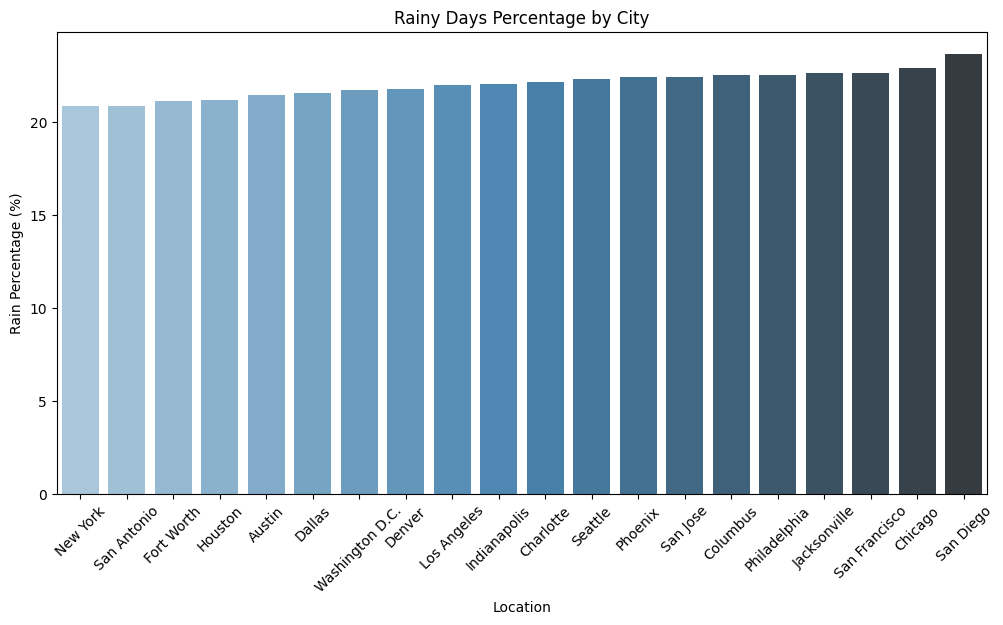

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=rain_percentage.sort_values('Rain Tomorrow', ascending=True),
    x='Location', y='Rain Tomorrow', palette='Blues_d'
)
plt.xticks(rotation=45)
plt.ylabel('Rain Percentage (%)')
plt.title('Rainy Days Percentage by City')
plt.show()


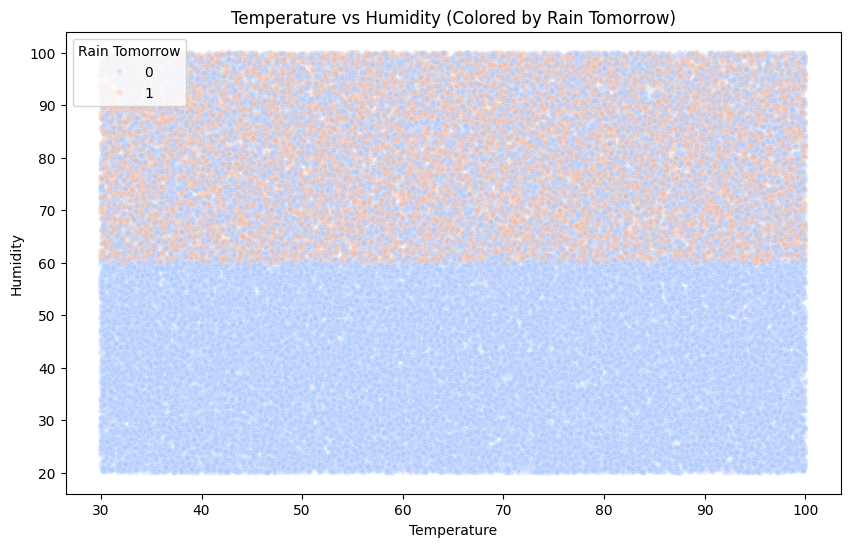

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Temperature',
    y='Humidity',
    hue='Rain Tomorrow',
    palette='coolwarm',
    alpha=0.3,s=20
)
plt.title('Temperature vs Humidity (Colored by Rain Tomorrow)')
plt.show()


<Axes: xlabel='Temperature', ylabel='Humidity'>

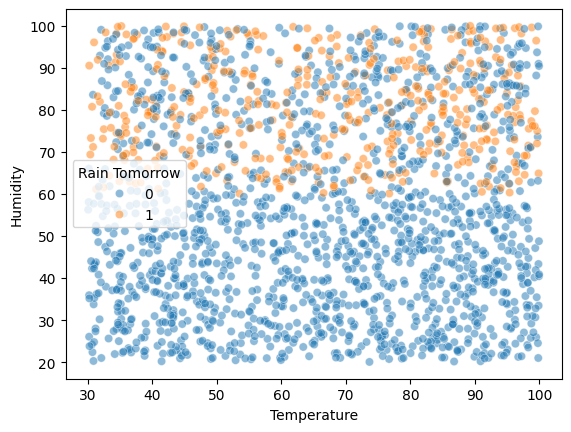

In [13]:
df_sample = df.sample(2000, random_state=42)  # Pick 2k random points
sns.scatterplot(
    data=df_sample, 
    x='Temperature',
    y='Humidity',
    hue='Rain Tomorrow',
    alpha=0.5
)


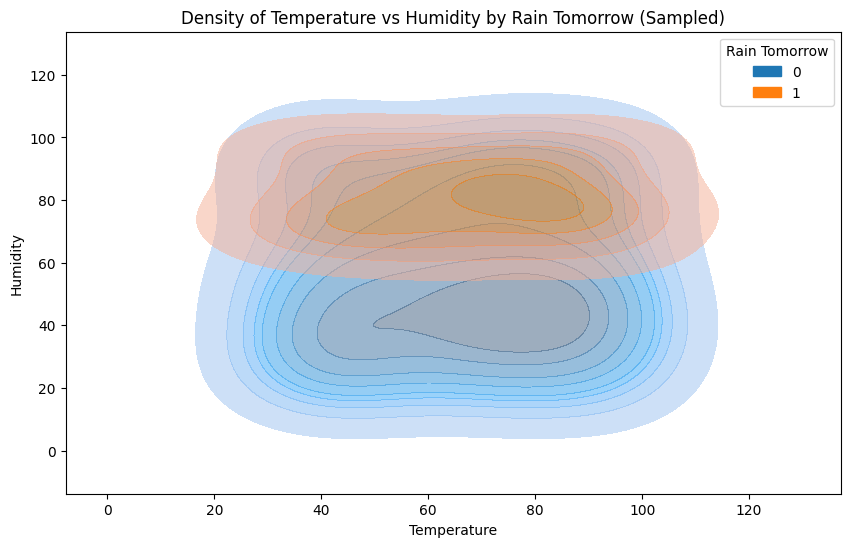

In [14]:
df_sample = df.sample(1000, random_state=42)
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df_sample,
    x='Temperature',
    y='Humidity',
    hue='Rain Tomorrow',
    fill=True,
    alpha=0.5,
    bw_adjust=1.5  # smoothness adjustment, higher = smoother, less compute
)
plt.title('Density of Temperature vs Humidity by Rain Tomorrow (Sampled)')
plt.show()


<Axes: xlabel='Temperature', ylabel='Precipitation'>

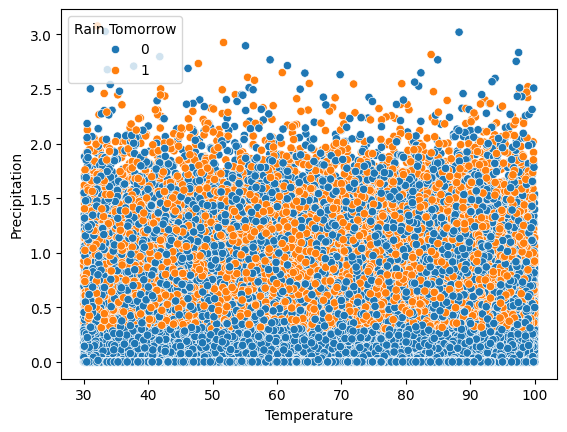

In [15]:
sns.scatterplot(data=df,y=df['Precipitation'],x=df['Temperature'],hue=df['Rain Tomorrow'])

<Axes: xlabel='Temperature', ylabel='Humidity'>

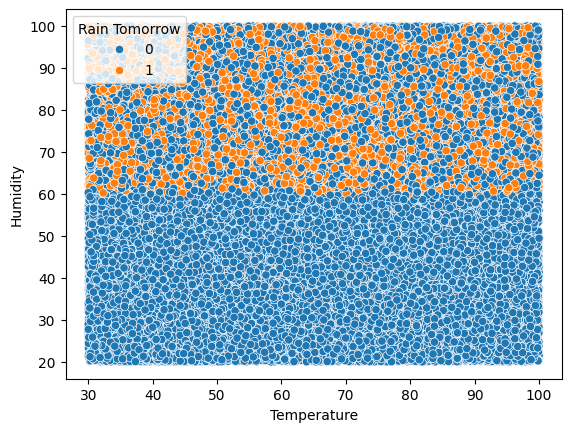

In [16]:
sns.scatterplot(data=df,y=df['Humidity'],x=df['Temperature'],hue=df['Rain Tomorrow'])

<Axes: xlabel='Humidity', ylabel='Precipitation'>

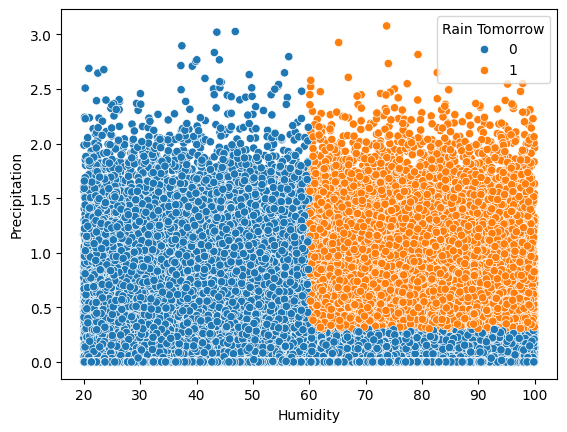

In [17]:
sns.scatterplot(data=df,x=df['Humidity'],y=df['Precipitation'],hue=df['Rain Tomorrow'])
#As humidity increases, the chance of rain tomorrow also increases you can see more orange points (rain) at higher humidity levels.

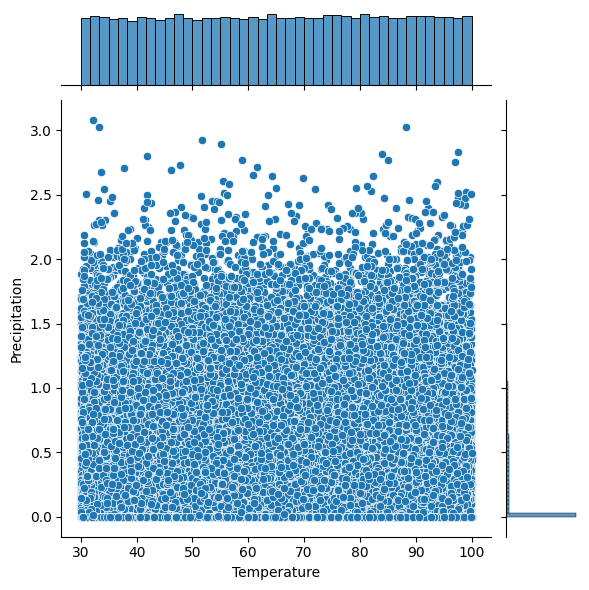

In [18]:
sns.jointplot(data=df, x='Temperature', y='Precipitation', kind='scatter')
plt.show()


<Axes: xlabel='Temperature', ylabel='Humidity'>

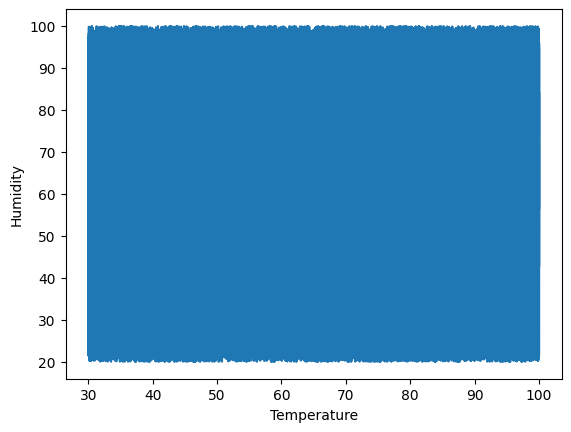

In [19]:
sns.lineplot(data=df,x=df['Temperature'],y=df['Humidity'])

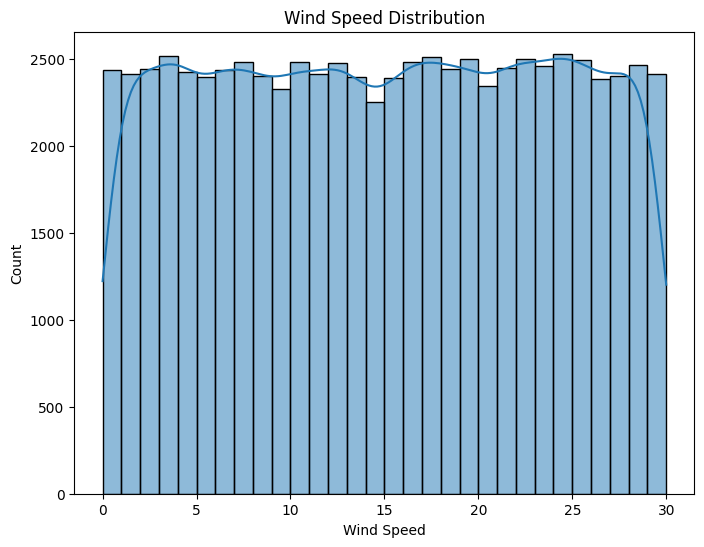

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(df['Wind Speed'], bins=30, kde=True)
plt.title('Wind Speed Distribution')
plt.show()


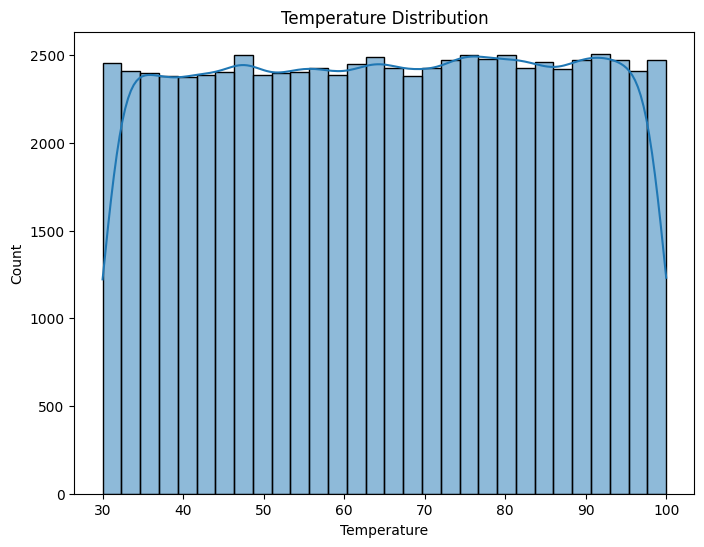

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.show()


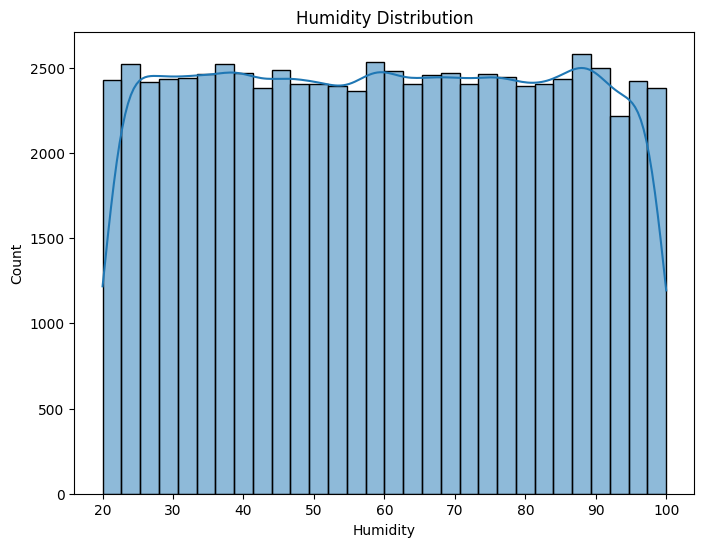

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(df['Humidity'], bins=30, kde=True)
plt.title('Humidity Distribution')
plt.show()


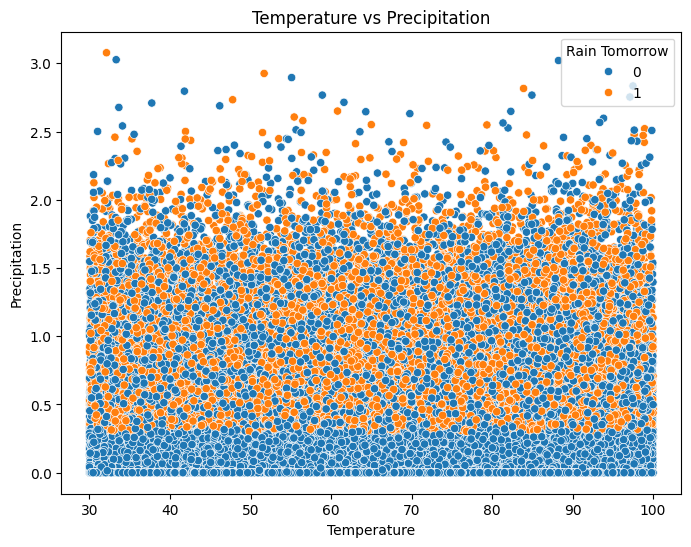

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Temperature', y='Precipitation',hue=df['Rain Tomorrow'])
plt.title('Temperature vs Precipitation')
plt.show()


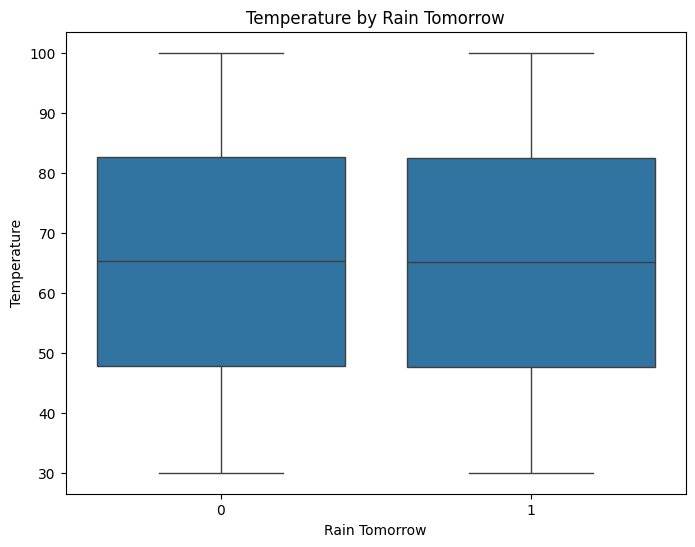

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Rain Tomorrow', y='Temperature')
plt.title('Temperature by Rain Tomorrow')
plt.show()


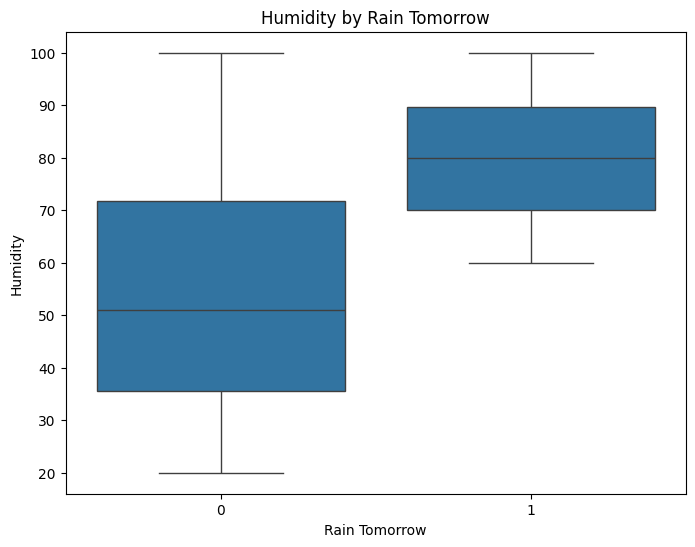

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Rain Tomorrow', y='Humidity')
plt.title('Humidity by Rain Tomorrow')
plt.show()


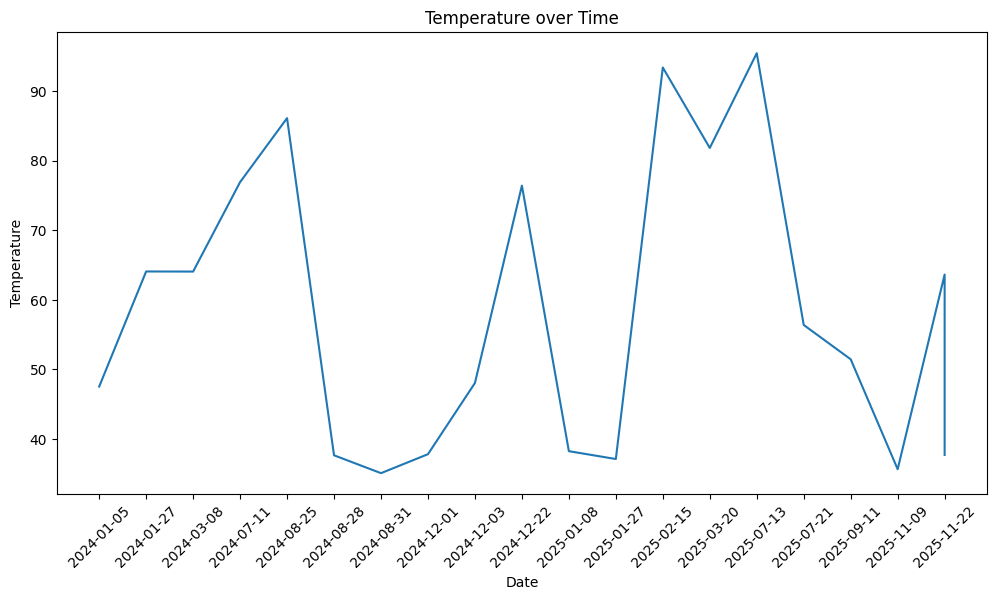

In [26]:
df_sample = df.sample(20, random_state=42) 
plt.figure(figsize=(12,6))
df_sorted = df_sample.sort_values('Date')
plt.plot(df_sorted['Date'], df_sorted['Temperature'])
plt.xticks(rotation=45)
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


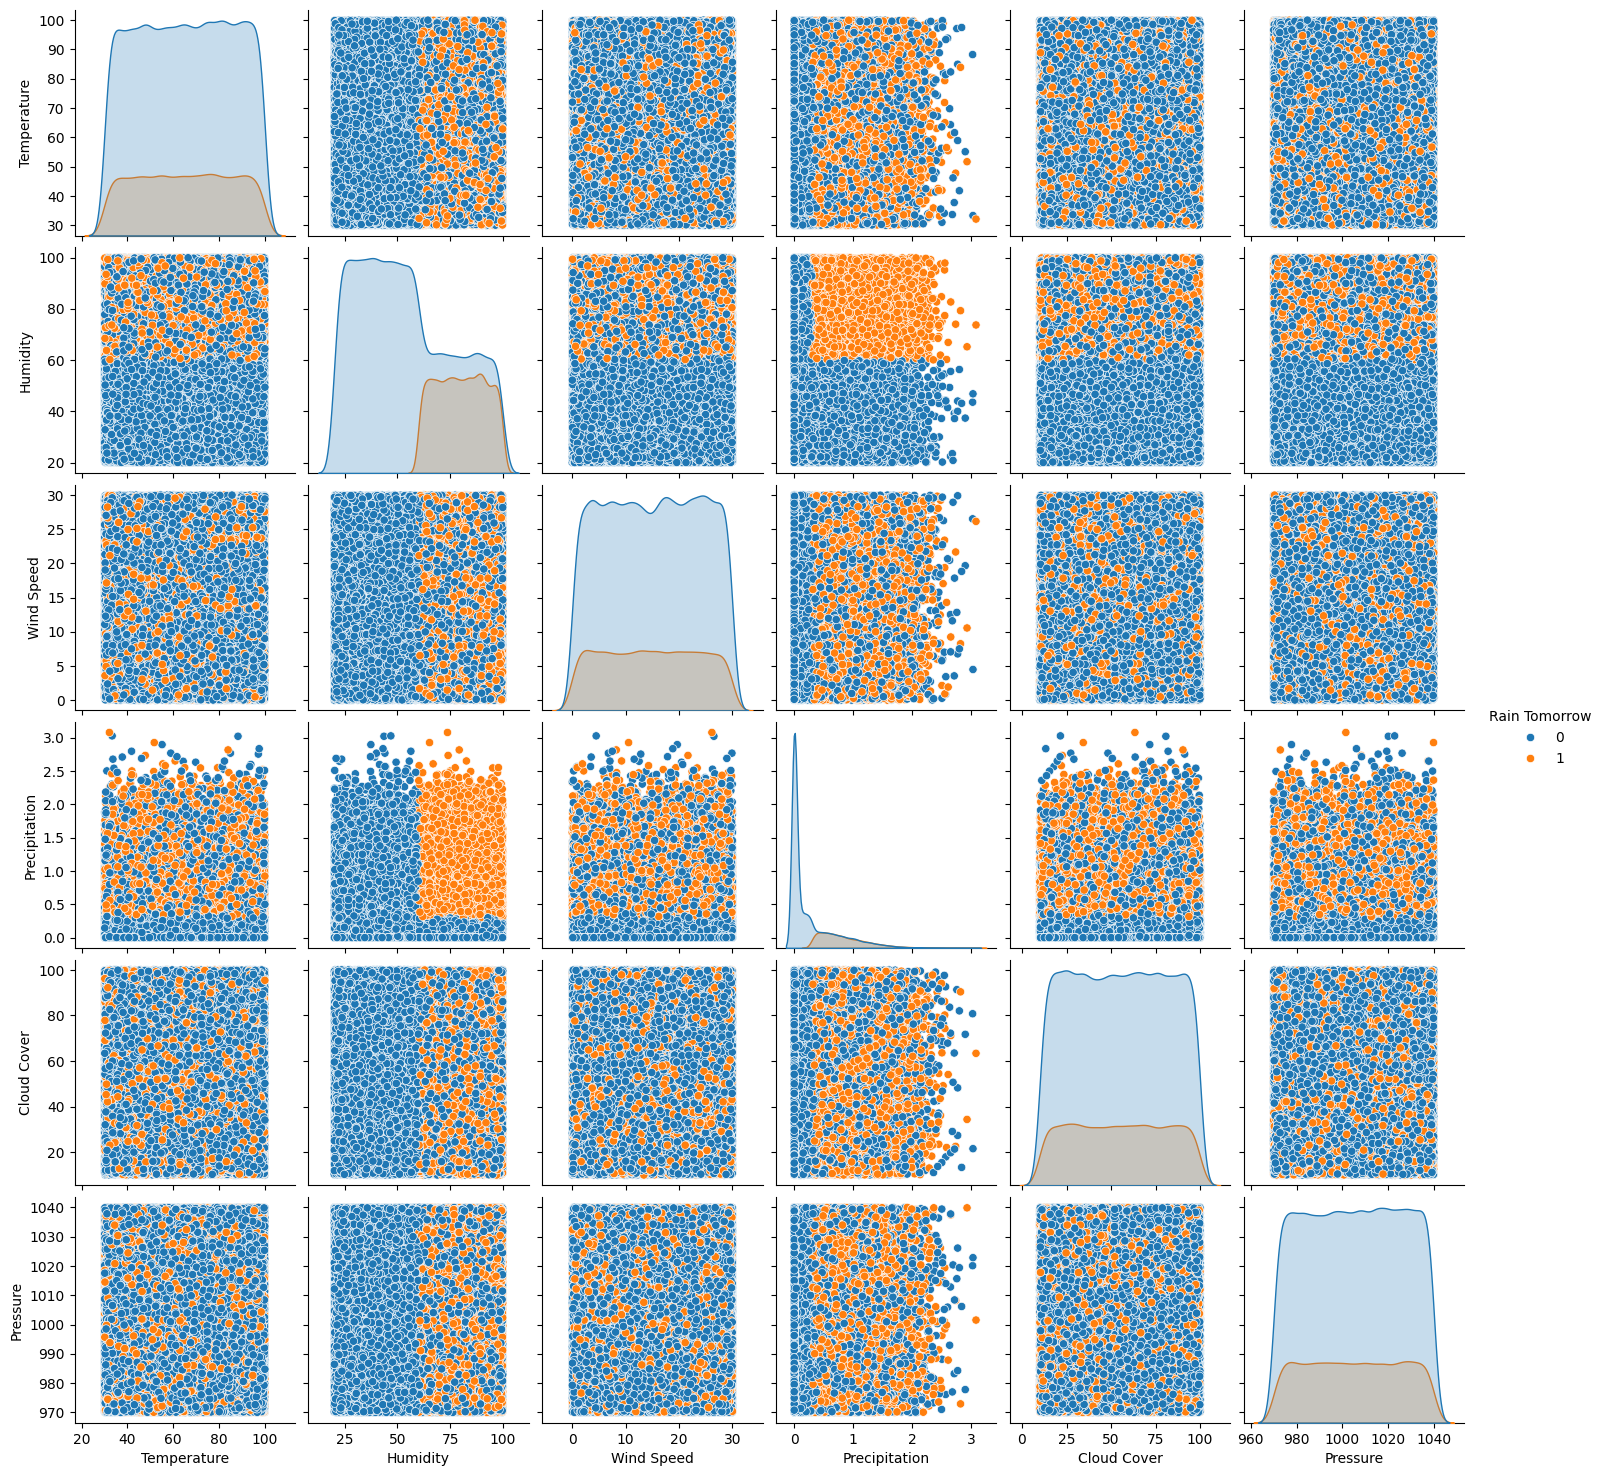

In [27]:
sns.pairplot(df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow']], hue='Rain Tomorrow')
plt.show()


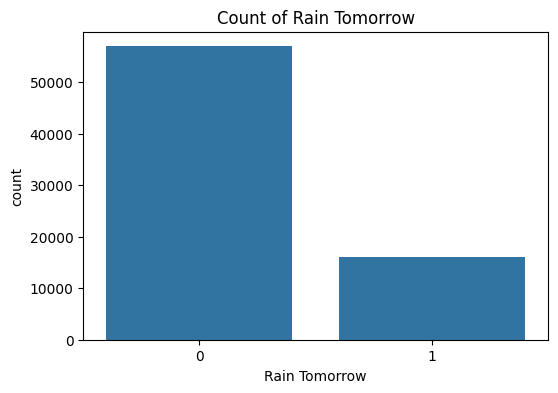

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Rain Tomorrow')
plt.title('Count of Rain Tomorrow')
plt.show()



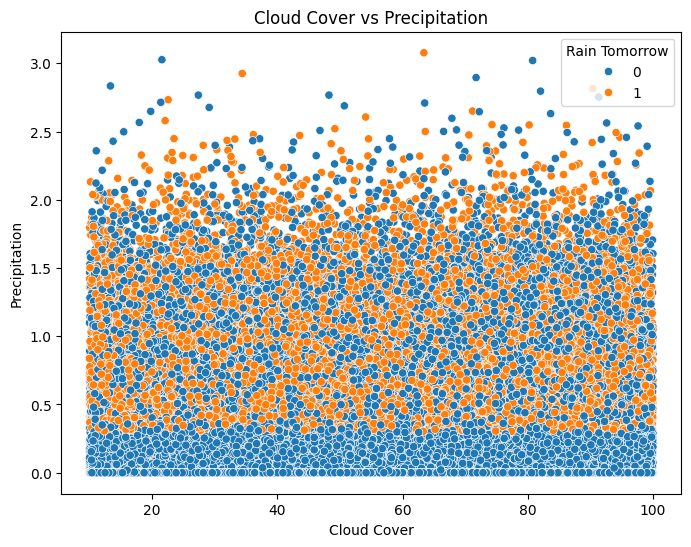

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Cloud Cover', y='Precipitation',hue=df['Rain Tomorrow'])
plt.title('Cloud Cover vs Precipitation')
plt.show()


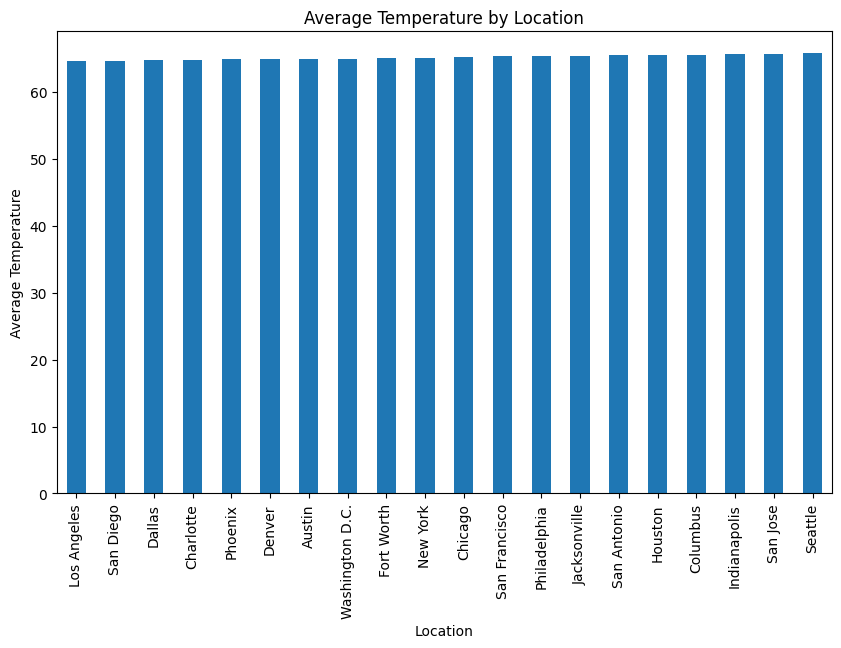

In [30]:
avg_temp = df.groupby('Location')['Temperature'].mean().sort_values()
plt.figure(figsize=(10,6))
avg_temp.plot(kind='bar')
plt.title('Average Temperature by Location')
plt.ylabel('Average Temperature')
plt.show()


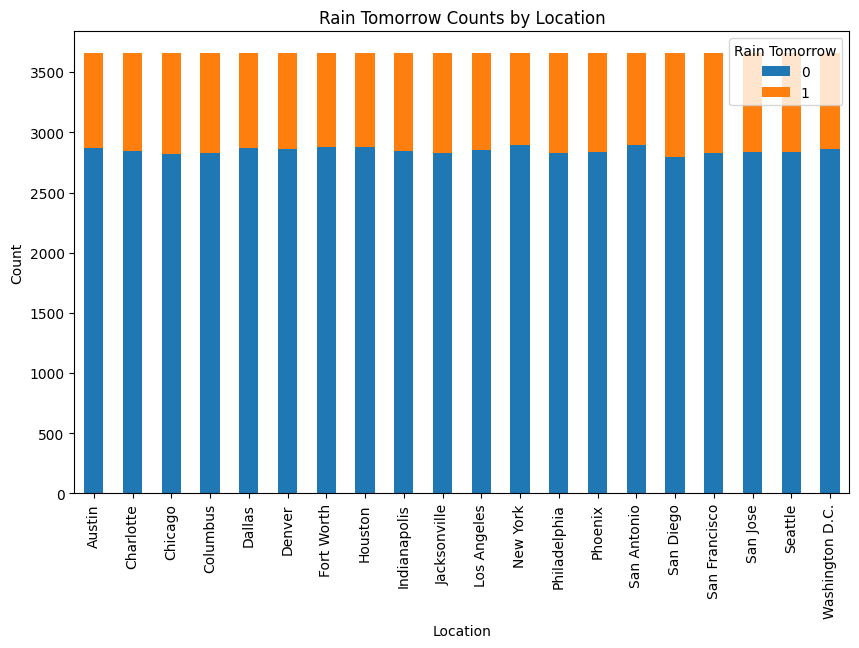

In [31]:
rain_counts = df.groupby(['Location', 'Rain Tomorrow']).size().unstack(fill_value=0)
rain_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Rain Tomorrow Counts by Location')
plt.ylabel('Count')
plt.show()


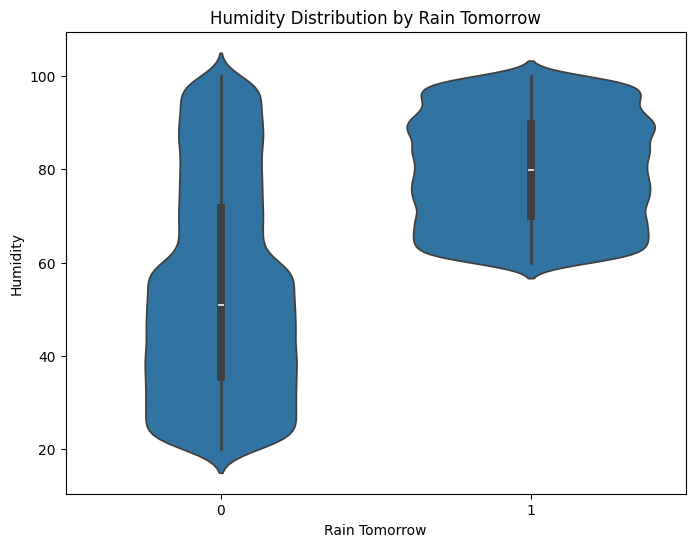

In [32]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Rain Tomorrow', y='Humidity')
plt.title('Humidity Distribution by Rain Tomorrow')
plt.show()


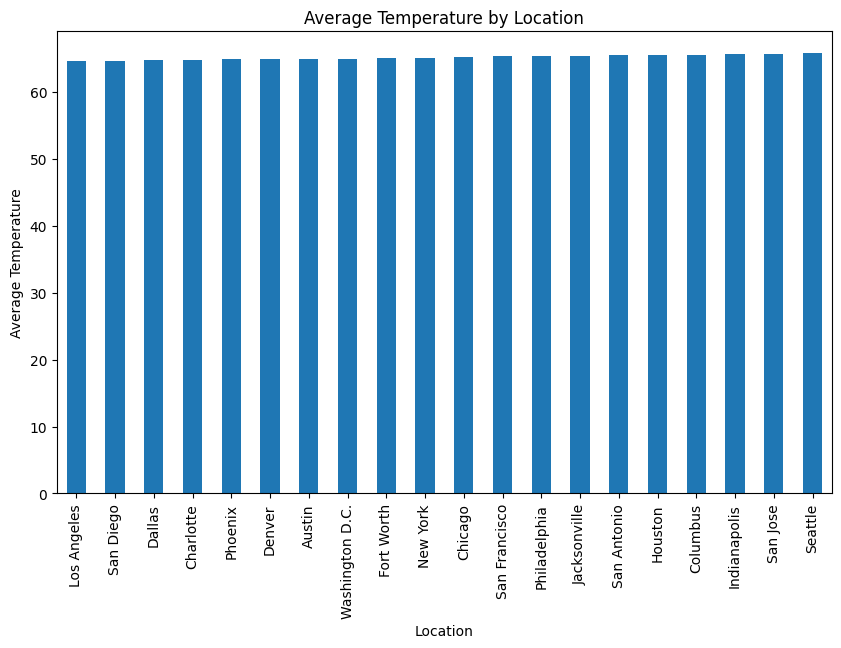

In [33]:
avg_temp = df.groupby('Location')['Temperature'].mean().sort_values()
plt.figure(figsize=(10,6))
avg_temp.plot(kind='bar')
plt.title('Average Temperature by Location')
plt.ylabel('Average Temperature')
plt.show()


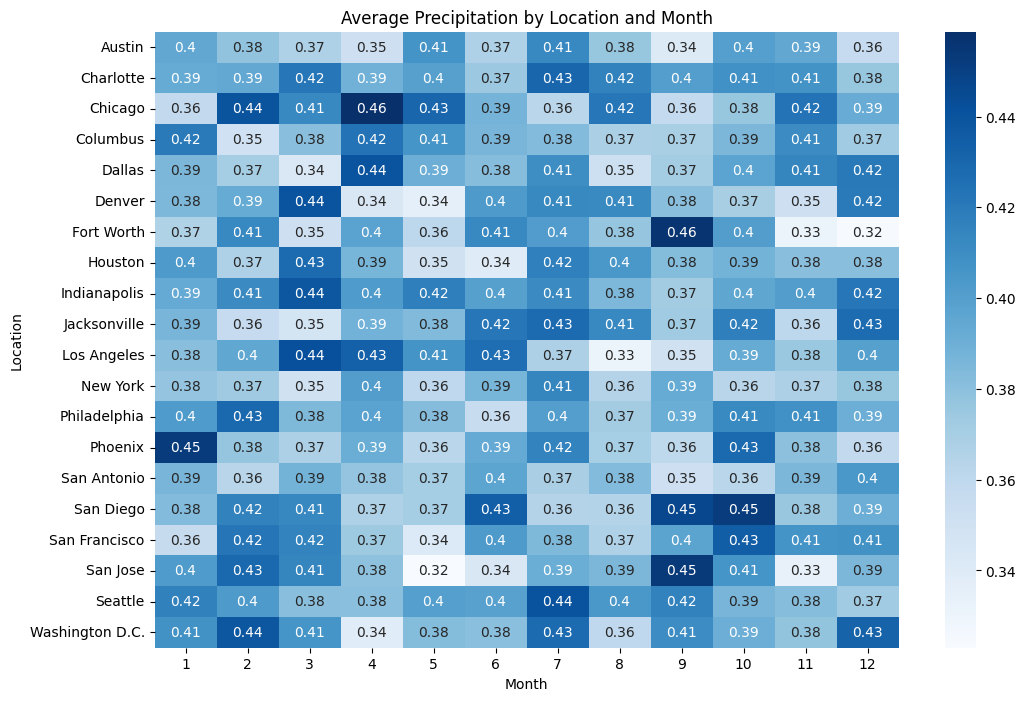

In [34]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
pivot_table = df.pivot_table(values='Precipitation', index='Location', columns='Month', aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Average Precipitation by Location and Month')
plt.show()


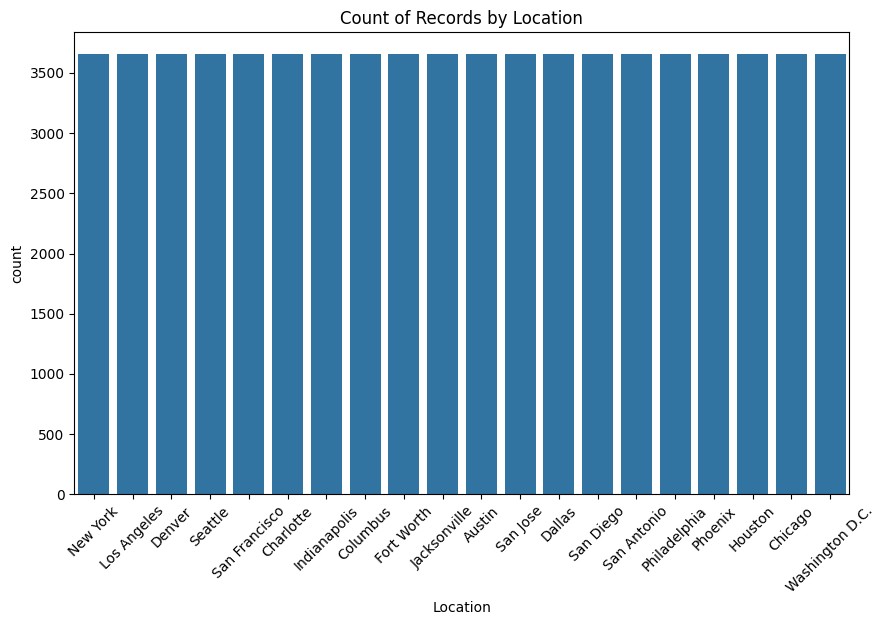

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title('Count of Records by Location')
plt.xticks(rotation=45)
plt.show()


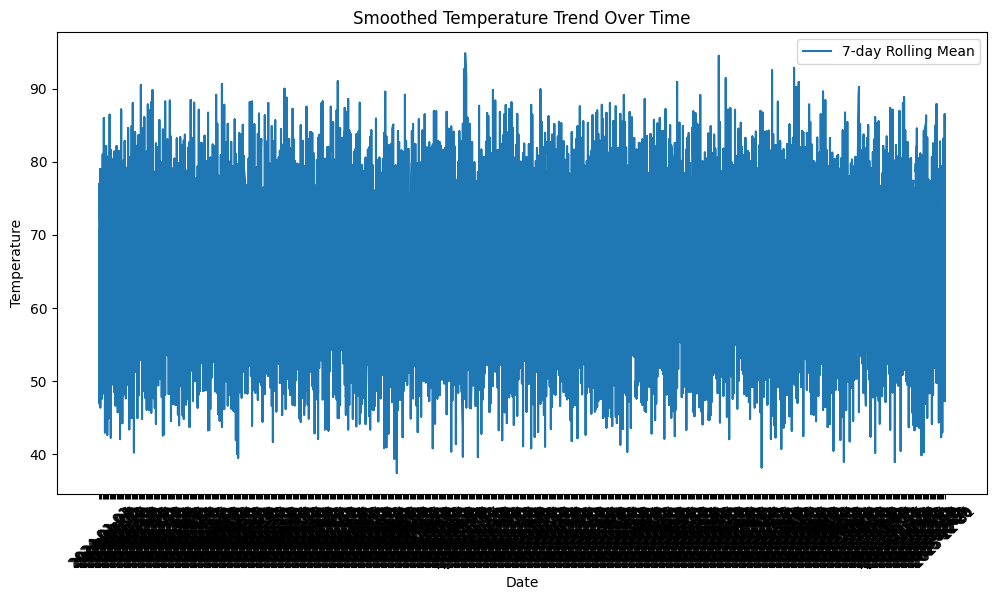

In [36]:
df_sorted = df.sort_values('Date')
df_sorted['Temperature_Rolling'] = df_sorted['Temperature'].rolling(window=7).mean()  # 7-day rolling mean

plt.figure(figsize=(12,6))
plt.plot(df_sorted['Date'], df_sorted['Temperature_Rolling'], label='7-day Rolling Mean')
plt.xticks(rotation=45)
plt.title('Smoothed Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [37]:
ohe=OneHotEncoder(sparse_output=False,drop='first') 

In [38]:
encoded_countries=ohe.fit_transform(df[['Location']])

In [39]:
df_countries=pd.DataFrame(encoded_countries,columns=ohe.get_feature_names_out(['Location']))

In [40]:
df

Date         Location  Temperature   Humidity  Wind Speed  \
0      2024-01-01         New York    87.524795  75.655455   28.379506   
1      2024-01-02         New York    83.259325  28.712617   12.436433   
2      2024-01-03         New York    80.943050  64.740043   14.184831   
3      2024-01-04         New York    78.097552  59.738984   19.444029   
4      2024-01-05         New York    37.059963  34.766784    3.689661   
...           ...              ...          ...        ...         ...   
73095  2025-12-27  Washington D.C.    40.614393  65.099438   28.778327   
73096  2025-12-28  Washington D.C.    52.641643  30.610525   12.282890   
73097  2025-12-29  Washington D.C.    56.492591  96.740232    2.894762   
73098  2025-12-30  Washington D.C.    65.748956  63.900004   24.632400   
73099  2025-12-31  Washington D.C.    54.648609  80.812021   22.722505   

       Precipitation  Cloud Cover     Pressure  Rain Tomorrow  Month  
0           0.000000    69.617966  1026.030278              0      1  
1           0.526995    41.606048   995.962065              0      1  
2           0.916884    77.364763   980.796739              1      1  
3           0.094134    52.541196   979.012163              0      1  
4           1.361272    85.584000  1031.790859              0      1  
...              ...          ...          ...            ...    ...  
73095       0.000000    54.168514   977.083747              0     12  
73096       0.871000    22.068055   980.591675              0     12  
73097       1.191956    52.336048  1016.469174              1     12  
73098       0.483421    76.785280  1032.396146              1     12  
73099       0.151903    19.674960   974.835534              0     12  

[73100 rows x 10 columns]

In [41]:
df.drop(df[['Date','Location']],axis=1,inplace=True)

In [42]:
sc=StandardScaler()
df
features_to_scale=df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]

In [43]:
scaled_features=sc.fit_transform(features_to_scale)

In [44]:
df_scaled=pd.DataFrame(scaled_features,columns=features_to_scale.columns)

In [45]:
final_df=pd.concat([df_countries,df_scaled,],axis=1)

In [46]:
final_df

Location_Charlotte  Location_Chicago  Location_Columbus  \
0                     0.0               0.0                0.0   
1                     0.0               0.0                0.0   
2                     0.0               0.0                0.0   
3                     0.0               0.0                0.0   
4                     0.0               0.0                0.0   
...                   ...               ...                ...   
73095                 0.0               0.0                0.0   
73096                 0.0               0.0                0.0   
73097                 0.0               0.0                0.0   
73098                 0.0               0.0                0.0   
73099                 0.0               0.0                0.0   

       Location_Dallas  Location_Denver  Location_Fort Worth  \
0                  0.0              0.0                  0.0   
1                  0.0              0.0                  0.0   
2                  0.0              0.0                  0.0   
3                  0.0              0.0                  0.0   
4                  0.0              0.0                  0.0   
...                ...              ...                  ...   
73095              0.0              0.0                  0.0   
73096              0.0              0.0                  0.0   
73097              0.0              0.0                  0.0   
73098              0.0              0.0                  0.0   
73099              0.0              0.0                  0.0   

       Location_Houston  Location_Indianapolis  Location_Jacksonville  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    0.0                    0.0   
4                   0.0                    0.0                    0.0   
...                 ...                    ...                    ...   
73095               0.0                    0.0                    0.0   
73096               0.0                    0.0                    0.0   
73097               0.0                    0.0                    0.0   
73098               0.0                    0.0                    0.0   
73099               0.0                    0.0                    0.0   

       Location_Los Angeles  ...  Location_San Francisco  Location_San Jose  \
0                       0.0  ...                     0.0                0.0   
1                       0.0  ...                     0.0                0.0   
2                       0.0  ...                     0.0                0.0   
3                       0.0  ...                     0.0                0.0   
4                       0.0  ...                     0.0                0.0   
...                     ...  ...                     ...                ...   
73095                   0.0  ...                     0.0                0.0   
73096                   0.0  ...                     0.0                0.0   
73097                   0.0  ...                     0.0                0.0   
73098                   0.0  ...                     0.0                0.0   
73099                   0.0  ...                     0.0                0.0   

       Location_Seattle  Location_Washington D.C.  Temperature  Humidity  \
0                   0.0                       0.0     1.105756  0.684143   
1                   0.0                       0.0     0.894653 -1.351014   
2                   0.0                       0.0     0.780018  0.210917   
3                   0.0                       0.0     0.639191 -0.005899   
4                   0.0                       0.0    -1.391804 -1.088542   
...                 ...                       ...          ...       ...   
73095               0.0                       1.0    -1.215891  0.226498   
73096      

In [47]:
data=pd.concat((final_df,df['Rain Tomorrow']),axis=1)


In [48]:
data

Location_Charlotte  Location_Chicago  Location_Columbus  \
0                     0.0               0.0                0.0   
1                     0.0               0.0                0.0   
2                     0.0               0.0                0.0   
3                     0.0               0.0                0.0   
4                     0.0               0.0                0.0   
...                   ...               ...                ...   
73095                 0.0               0.0                0.0   
73096                 0.0               0.0                0.0   
73097                 0.0               0.0                0.0   
73098                 0.0               0.0                0.0   
73099                 0.0               0.0                0.0   

       Location_Dallas  Location_Denver  Location_Fort Worth  \
0                  0.0              0.0                  0.0   
1                  0.0              0.0                  0.0   
2                  0.0              0.0                  0.0   
3                  0.0              0.0                  0.0   
4                  0.0              0.0                  0.0   
...                ...              ...                  ...   
73095              0.0              0.0                  0.0   
73096              0.0              0.0                  0.0   
73097              0.0              0.0                  0.0   
73098              0.0              0.0                  0.0   
73099              0.0              0.0                  0.0   

       Location_Houston  Location_Indianapolis  Location_Jacksonville  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    0.0                    0.0   
4                   0.0                    0.0                    0.0   
...                 ...                    ...                    ...   
73095               0.0                    0.0                    0.0   
73096               0.0                    0.0                    0.0   
73097               0.0                    0.0                    0.0   
73098               0.0                    0.0                    0.0   
73099               0.0                    0.0                    0.0   

       Location_Los Angeles  ...  Location_San Jose  Location_Seattle  \
0                       0.0  ...                0.0               0.0   
1                       0.0  ...                0.0               0.0   
2                       0.0  ...                0.0               0.0   
3                       0.0  ...                0.0               0.0   
4                       0.0  ...                0.0               0.0   
...                     ...  ...                ...               ...   
73095                   0.0  ...                0.0               0.0   
73096                   0.0  ...                0.0               0.0   
73097                   0.0  ...                0.0               0.0   
73098                   0.0  ...                0.0               0.0   
73099                   0.0  ...                0.0               0.0   

       Location_Washington D.C.  Temperature  Humidity  Wind Speed  \
0                           0.0     1.105756  0.684143    1.541362   
1                           0.0     0.894653 -1.351014   -0.297798   
2                           0.0     0.780018  0.210917   -0.096107   
3                           0.0     0.639191 -0.005899    0.510584   
4                           0.0    -1.391804 -1.088542   -1.306808   
...                         ...          ...       ...         ...   
73095                       1.0    -1.215891  0.226498    1.587369   
73096                       1.0    -0.620649 -1.268732   -0.315511   
73097                       1.0    -0.430062  1.598251   -1.3

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(data.drop(['Rain Tomorrow'],axis=1),df['Rain Tomorrow'],test_size=0.2,random_state=42)

In [50]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, precision_score, recall_score,  roc_auc_score,precision_recall_curve


In [51]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_classifiers_with_train_metrics(X_train, X_test, y_train, y_test):
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'DecisionTree': DecisionTreeClassifier(max_depth=4),
        'ExtraTree': ExtraTreeClassifier(max_depth=4),
        'GradientBoosting': GradientBoostingClassifier(max_depth=5),
        'RandomForest': RandomForestClassifier(max_depth=5),
        'AdaBoost': AdaBoostClassifier(),
        'Bagging': BaggingClassifier(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'KNN': KNeighborsClassifier(n_neighbors=4),
        'NaiveBayes': GaussianNB()
    }

    results = {}

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")
        start_time = time.time()
        
        model.fit(X_train, y_train)
        train_time = time.time() - start_time
        print(f"✅ Finished {name} in {train_time:.2f} seconds")

        # Predictions on train set
        y_train_pred = model.predict(X_train)
        try:
            y_train_prob = model.predict_proba(X_train)[:, 1]
            roc_auc_train = roc_auc_score(y_train, y_train_prob)
        except AttributeError:
            try:
                y_train_scores = model.decision_function(X_train)
                roc_auc_train = roc_auc_score(y_train, y_train_scores)
            except Exception:
                roc_auc_train = None

   
        y_test_pred = model.predict(X_test)
        try:
            y_test_prob = model.predict_proba(X_test)[:, 1]
            roc_auc_test = roc_auc_score(y_test, y_test_prob)
        except AttributeError:
            try:
                y_test_scores = model.decision_function(X_test)
                roc_auc_test = roc_auc_score(y_test, y_test_scores)
            except Exception:
                roc_auc_test = None
        results[name] = {
            'train': {
                'Accuracy': accuracy_score(y_train, y_train_pred),
                'Precision': precision_score(y_train, y_train_pred, zero_division=0),
                'Recall': recall_score(y_train, y_train_pred, zero_division=0),
                'F1 Score': f1_score(y_train, y_train_pred, zero_division=0),
                'ROC AUC': roc_auc_train,
                'Confusion Matrix': confusion_matrix(y_train, y_train_pred)
            },
            'test': {
                'Accuracy': accuracy_score(y_test, y_test_pred),
                'Precision': precision_score(y_test, y_test_pred, zero_division=0),
                'Recall': recall_score(y_test, y_test_pred, zero_division=0),
                'F1 Score': f1_score(y_test, y_test_pred, zero_division=0),
                'ROC AUC': roc_auc_test,
                'Confusion Matrix': confusion_matrix(y_test, y_test_pred)
            }
        }

        for split_name, metrics in results[name].items():
            print(f"\n--- {split_name.upper()} SET ---")
            for metric_name, value in metrics.items():
                if metric_name == 'Confusion Matrix':
                    print(f"{metric_name}:\n{value}")
                else:
                    print(f"{metric_name}: {value:.4f}" if value is not None else f"{metric_name}: None")

    return results


results = evaluate_classifiers_with_train_metrics(X_train, X_test, Y_train, Y_test)



🔹 Training LogisticRegression...
✅ Finished LogisticRegression in 0.19 seconds

--- TRAIN SET ---
Accuracy: 0.9042
Precision: 0.8359
Recall: 0.7024
F1 Score: 0.7634
ROC AUC: 0.9485
Confusion Matrix:
[[43845  1774]
 [ 3827  9034]]

--- TEST SET ---
Accuracy: 0.9087
Precision: 0.8553
Recall: 0.7093
F1 Score: 0.7755
ROC AUC: 0.9519
Confusion Matrix:
[[10979   390]
 [  945  2306]]

🔹 Training DecisionTree...
✅ Finished DecisionTree in 0.17 seconds

--- TRAIN SET ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[45619     0]
 [    0 12861]]

--- TEST SET ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[11369     0]
 [    0  3251]]

🔹 Training ExtraTree...
✅ Finished ExtraTree in 0.03 seconds

--- TRAIN SET ---
Accuracy: 0.7811
Precision: 0.5572
Recall: 0.0231
F1 Score: 0.0443
ROC AUC: 0.8215
Confusion Matrix:
[[45383   236]
 [12564   297]]

--- TEST SET ---
Accuracy: 0.7781
Pr

C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ Finished AdaBoost in 11.37 seconds

--- TRAIN SET ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[45619     0]
 [    0 12861]]

--- TEST SET ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[11369     0]
 [    0  3251]]

🔹 Training Bagging...
✅ Finished Bagging in 1.55 seconds

--- TRAIN SET ---
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[45618     1]
 [    0 12861]]

--- TEST SET ---
Accuracy: 0.9999
Precision: 0.9997
Recall: 1.0000
F1 Score: 0.9998
ROC AUC: 1.0000
Confusion Matrix:
[[11368     1]
 [    0  3251]]

🔹 Training XGBoost...


C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:13:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Finished XGBoost in 0.52 seconds

--- TRAIN SET ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[45619     0]
 [    0 12861]]

--- TEST SET ---
Accuracy: 0.9992
Precision: 0.9982
Recall: 0.9982
F1 Score: 0.9982
ROC AUC: 1.0000
Confusion Matrix:
[[11363     6]
 [    6  3245]]

🔹 Training KNN...
✅ Finished KNN in 0.02 seconds

--- TRAIN SET ---
Accuracy: 0.9650
Precision: 0.9876
Recall: 0.8513
F1 Score: 0.9144
ROC AUC: 0.9964
Confusion Matrix:
[[45482   137]
 [ 1912 10949]]

--- TEST SET ---
Accuracy: 0.9460
Precision: 0.9649
Recall: 0.7859
F1 Score: 0.8662
ROC AUC: 0.9827
Confusion Matrix:
[[11276    93]
 [  696  2555]]

🔹 Training NaiveBayes...
✅ Finished NaiveBayes in 0.05 seconds

--- TRAIN SET ---
Accuracy: 0.9117
Precision: 0.9559
Recall: 0.6275
F1 Score: 0.7576
ROC AUC: 0.9728
Confusion Matrix:
[[45247   372]
 [ 4791  8070]]

--- TEST SET ---
Accuracy: 0.9130
Precision: 0.9626
Recall: 0.6333
F1 Score: 0.7640
ROC AUC: 0.97

# TUNING THEM 

In [52]:
from sklearn.model_selection import GridSearchCV
import numpy as np

def tune_classifiers_with_gridsearch(X_train, Y_train):
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'ExtraTree': ExtraTreeClassifier(random_state=42),
        'GradientBoosting': GradientBoostingClassifier(random_state=42),
        'RandomForest': RandomForestClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'Bagging': BaggingClassifier(random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'KNN': KNeighborsClassifier(),
        'NaiveBayes': GaussianNB()
    }


    param_grids = {
        'LogisticRegression': {
            'C': [0.01, 0.1, 1],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        },
        'DecisionTree': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'ExtraTree': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'GradientBoosting': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        },
        'RandomForest': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'AdaBoost': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1, 1]
        },
        'Bagging': {
            'n_estimators': [10, 50],
            'max_samples': [0.5, 1.0],
            'max_features': [0.5, 1.0]
        },
        'XGBoost': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        },
        'KNN': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        },
        'NaiveBayes': {} 
    }

    best_params = {}

    for name, model in models.items():
        print(f"\n🔍 Tuning {name}...")
        if param_grids[name]:  
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grids[name],
                cv=3,
                scoring='f1',  
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X_train, Y_train)
            best_params[name] = {
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_
            }
            print(f"✅ Best params for {name}: {grid_search.best_params_}")
            print(f"📊 Best CV F1 Score: {grid_search.best_score_:.4f}")
        else:
            print(f"⏭ No parameters to tune for {name}. Skipping.")
            best_params[name] = {
                'best_params': None,
                'best_score': None
            }

    return best_params


In [53]:
best_model_params = tune_classifiers_with_gridsearch(X_train, Y_train)



🔍 Tuning LogisticRegression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ Best params for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
📊 Best CV F1 Score: 0.7621

🔍 Tuning DecisionTree...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best params for DecisionTree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
📊 Best CV F1 Score: 0.9999

🔍 Tuning ExtraTree...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best params for ExtraTree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
📊 Best CV F1 Score: 0.7907

🔍 Tuning GradientBoosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best params for GradientBoosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
📊 Best CV F1 Score: 0.9999

🔍 Tuning RandomForest...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Best params for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, '

C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ Best params for AdaBoost: {'learning_rate': 0.05, 'n_estimators': 50}
📊 Best CV F1 Score: 0.9999

🔍 Tuning Bagging...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best params for Bagging: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
📊 Best CV F1 Score: 1.0000

🔍 Tuning XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:22:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best params for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
📊 Best CV F1 Score: 0.9980

🔍 Tuning KNN...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best params for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
📊 Best CV F1 Score: 0.8912

🔍 Tuning NaiveBayes...
⏭ No parameters to tune for NaiveBayes. Skipping.


In [54]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_classifiers_with_train_metrics(X_train, X_test, y_train, y_test):
    models = {
        'LogisticRegression': LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42),
        'DecisionTree': DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=42),
        'ExtraTree': ExtraTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=5, random_state=42),
        'GradientBoosting': GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=50, random_state=42),
        'RandomForest': RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42),
        'AdaBoost': AdaBoostClassifier(learning_rate=0.05, n_estimators=50, algorithm='SAMME', random_state=42),
        'Bagging': BaggingClassifier(max_features=1.0, max_samples=0.5, n_estimators=50, random_state=42),
        'XGBoost': XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'),
        'NaiveBayes': GaussianNB()
    }

    results = {}

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")
        start_time = time.time()
        
      
        model.fit(X_train, y_train)
        train_time = time.time() - start_time
        print(f"✅ Finished {name} in {train_time:.2f} seconds")

      
        y_train_pred = model.predict(X_train)
        try:
            y_train_prob = model.predict_proba(X_train)[:, 1]
            roc_auc_train = roc_auc_score(y_train, y_train_prob)
        except AttributeError:
            try:
                y_train_scores = model.decision_function(X_train)
                roc_auc_train = roc_auc_score(y_train, y_train_scores)
            except:
                roc_auc_train = None

    
        y_test_pred = model.predict(X_test)
        try:
            y_test_prob = model.predict_proba(X_test)[:, 1]
            roc_auc_test = roc_auc_score(y_test, y_test_prob)
        except AttributeError:
            try:
                y_test_scores = model.decision_function(X_test)
                roc_auc_test = roc_auc_score(y_test, y_test_scores)
            except:
                roc_auc_test = None

        results[name] = {
            'train': {
                'Accuracy': accuracy_score(y_train, y_train_pred),
                'Precision': precision_score(y_train, y_train_pred, zero_division=0),
                'Recall': recall_score(y_train, y_train_pred, zero_division=0),
                'F1 Score': f1_score(y_train, y_train_pred, zero_division=0),
                'ROC AUC': roc_auc_train,
                'Confusion Matrix': confusion_matrix(y_train, y_train_pred)
            },
            'test': {
                'Accuracy': accuracy_score(y_test, y_test_pred),
                'Precision': precision_score(y_test, y_test_pred, zero_division=0),
                'Recall': recall_score(y_test, y_test_pred, zero_division=0),
                'F1 Score': f1_score(y_test, y_test_pred, zero_division=0),
                'ROC AUC': roc_auc_test,
                'Confusion Matrix': confusion_matrix(y_test, y_test_pred)
            }
        }

        # Print results
        for split_name, metrics in results[name].items():
            print(f"\n--- {split_name.upper()} SET ---")
            for metric_name, value in metrics.items():
                if metric_name == 'Confusion Matrix':
                    print(f"{metric_name}:\n{value}")
                else:
                    print(f"{metric_name}: {value:.4f}" if value is not None else f"{metric_name}: None")

    return results



results = evaluate_classifiers_with_train_metrics(X_train, X_test, Y_train, Y_test)



🔹 Training LogisticRegression...
✅ Finished LogisticRegression in 0.15 seconds

--- TRAIN SET ---
Accuracy: 0.9042
Precision: 0.8364
Recall: 0.7015
F1 Score: 0.7630
ROC AUC: 0.9485
Confusion Matrix:
[[43854  1765]
 [ 3839  9022]]

--- TEST SET ---
Accuracy: 0.9091
Precision: 0.8575
Recall: 0.7090
F1 Score: 0.7762
ROC AUC: 0.9520
Confusion Matrix:
[[10986   383]
 [  946  2305]]

🔹 Training DecisionTree...
✅ Finished DecisionTree in 0.19 seconds

--- TRAIN SET ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[45619     0]
 [    0 12861]]

--- TEST SET ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[11369     0]
 [    0  3251]]

🔹 Training ExtraTree...
✅ Finished ExtraTree in 0.03 seconds

--- TRAIN SET ---
Accuracy: 0.7803
Precision: 0.5566
Recall: 0.0046
F1 Score: 0.0091
ROC AUC: 0.5315
Confusion Matrix:
[[45572    47]
 [12802    59]]

--- TEST SET ---
Accuracy: 0.7776
Pr

C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:37:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- TRAIN SET ---
Accuracy: 0.9990
Precision: 0.9976
Recall: 0.9979
F1 Score: 0.9977
ROC AUC: 1.0000
Confusion Matrix:
[[45588    31]
 [   27 12834]]

--- TEST SET ---
Accuracy: 0.9995
Precision: 0.9982
Recall: 0.9994
F1 Score: 0.9988
ROC AUC: 1.0000
Confusion Matrix:
[[11363     6]
 [    2  3249]]

🔹 Training KNN...
✅ Finished KNN in 0.02 seconds

--- TRAIN SET ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[45619     0]
 [    0 12861]]

--- TEST SET ---
Accuracy: 0.9616
Precision: 0.9593
Recall: 0.8637
F1 Score: 0.9090
ROC AUC: 0.9928
Confusion Matrix:
[[11250   119]
 [  443  2808]]

🔹 Training NaiveBayes...
✅ Finished NaiveBayes in 0.04 seconds

--- TRAIN SET ---
Accuracy: 0.9117
Precision: 0.9559
Recall: 0.6275
F1 Score: 0.7576
ROC AUC: 0.9728
Confusion Matrix:
[[45247   372]
 [ 4791  8070]]

--- TEST SET ---
Accuracy: 0.9130
Precision: 0.9626
Recall: 0.6333
F1 Score: 0.7640
ROC AUC: 0.9742
Confusion Matrix:
[[11289    80]

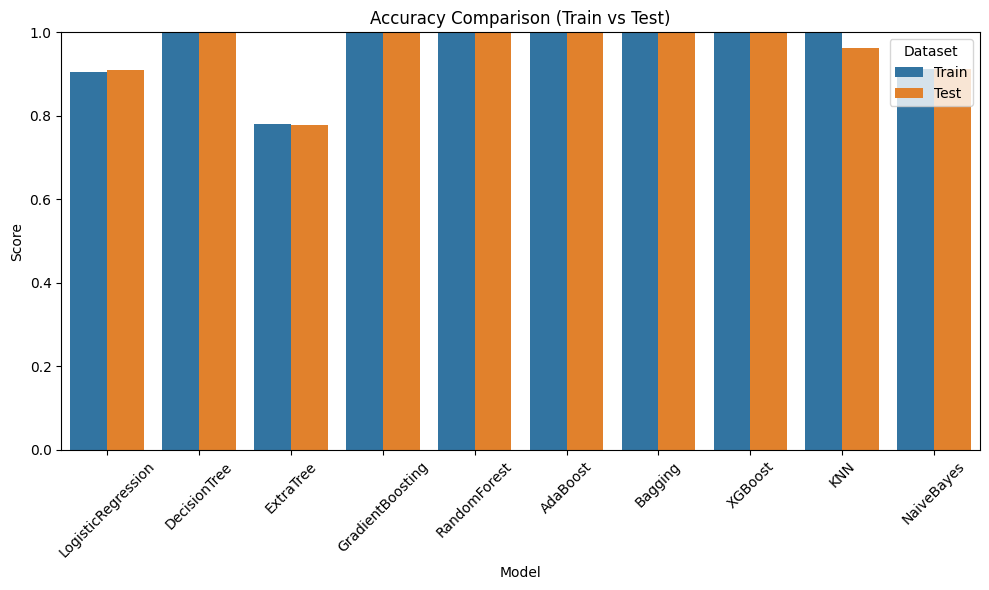

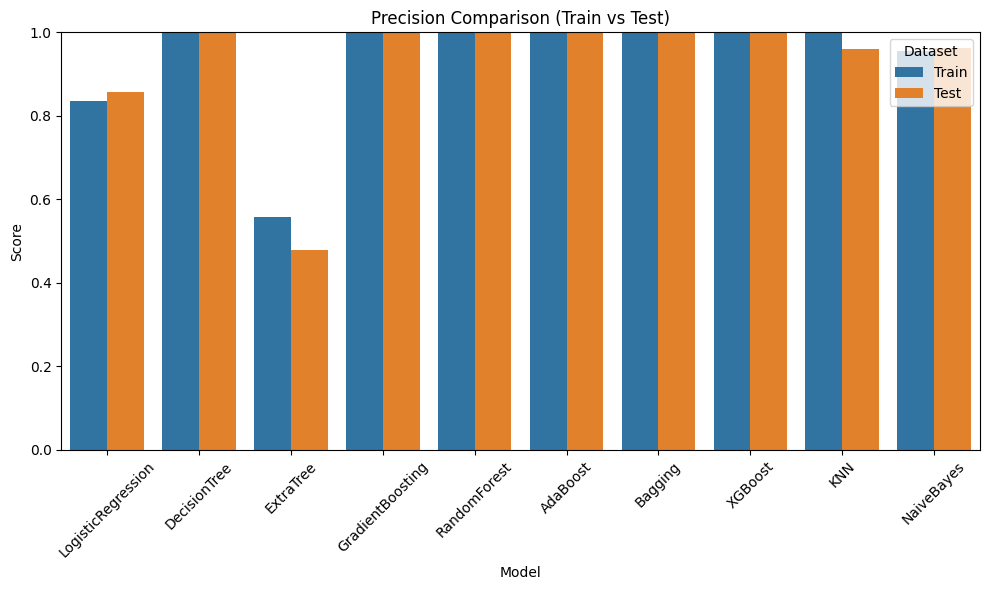

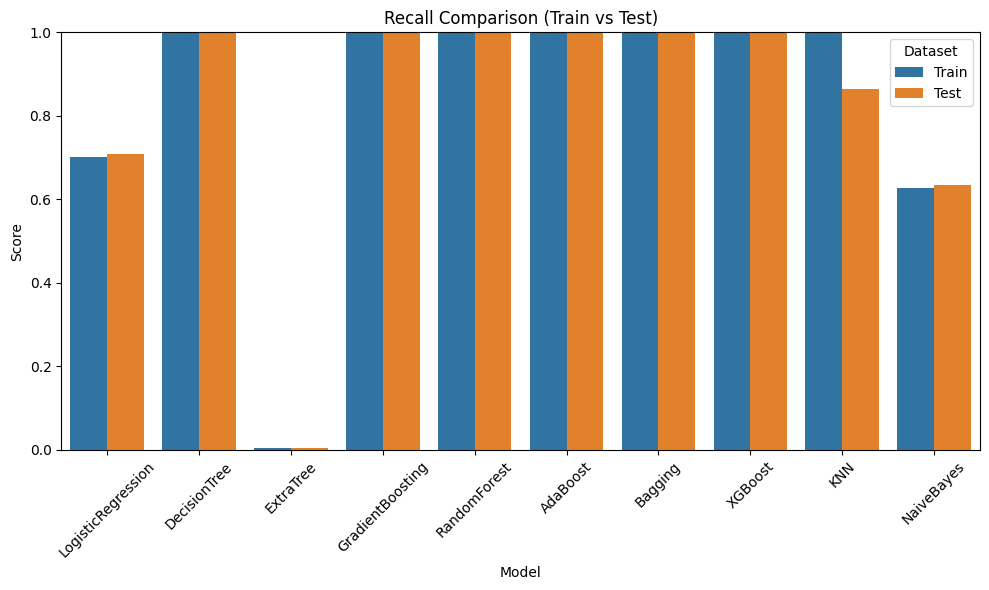

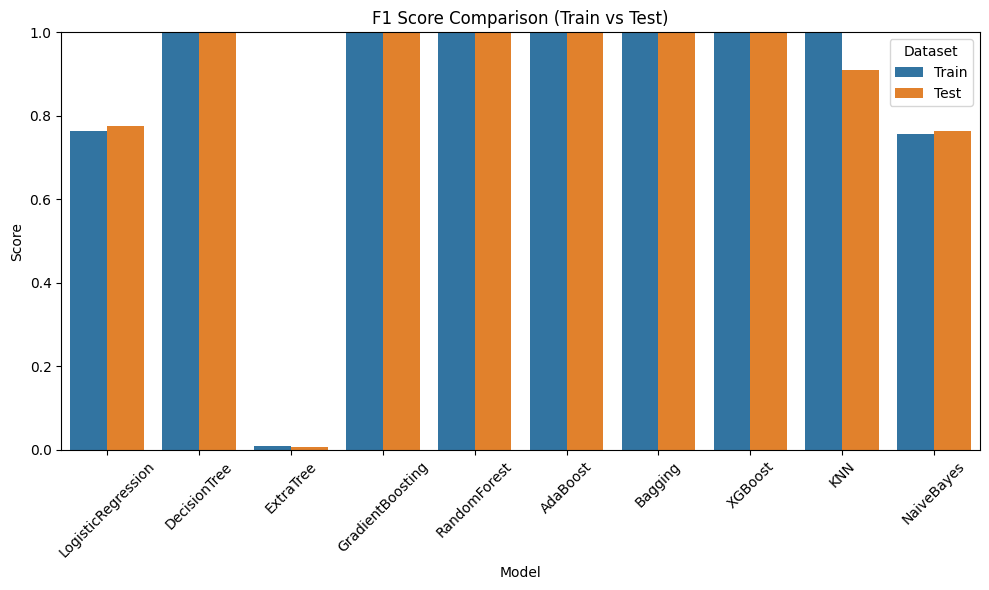

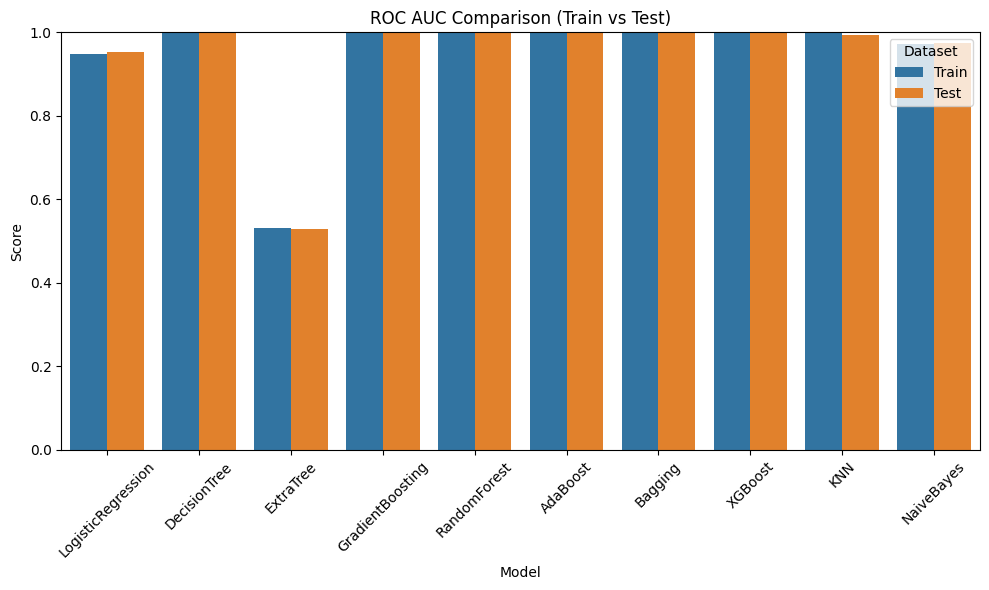

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def results_to_dataframe(results):
    rows = []
    for model_name, data in results.items():
        for dataset_type, metrics in data.items():
            for metric_name, value in metrics.items():
                if metric_name != 'Confusion Matrix':  
                    rows.append({
                        'Model': model_name,
                        'Dataset': dataset_type.capitalize(),
                        'Metric': metric_name,
                        'Score': value
                    })
    return pd.DataFrame(rows)


df_results = results_to_dataframe(results)


metrics_to_plot = df_results['Metric'].unique()

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_results[df_results['Metric'] == metric],
        x='Model', y='Score', hue='Dataset'
    )
    plt.title(f'{metric} Comparison (Train vs Test)')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()


In [56]:
import pickle


models = {
    'LogisticRegression': LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=42),
    'ExtraTree': ExtraTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=5, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=50, random_state=42),
    'RandomForest': RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostClassifier(learning_rate=0.05, n_estimators=50, algorithm='SAMME', random_state=42),
    'Bagging': BaggingClassifier(max_features=1.0, max_samples=0.5, n_estimators=50, random_state=42),
    'XGBoost': XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'),
    'NaiveBayes': GaussianNB()
}


for name, model in models.items():
    model.fit(X_train, Y_train)


with open("rainfall_models.pkl", "wb") as f:
    pickle.dump(models, f)

print("✅ All trained models saved to rainfall_models.pkl")


C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:38:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ All trained models saved to rainfall_models.pkl


In [59]:
import pickle

with open("rainfall_models.pkl", "rb") as f:
    loaded_models = pickle.load(f)

# Example: Predict using Random Forest
rf_model = loaded_models['NaiveBayes']
pred = rf_model.predict(X_test)
print(pred)


[0 0 1 ... 1 1 0]


In [60]:
import pickle

# Load the saved models from the pickle file
with open("rainfall_models.pkl", "rb") as file:
    loaded_models = pickle.load(file)

# Check what models are inside
print("Models loaded from pickle:")
for model_name in loaded_models.keys():
    print(model_name)


Models loaded from pickle:
LogisticRegression
DecisionTree
ExtraTree
GradientBoosting
RandomForest
AdaBoost
Bagging
XGBoost
KNN
NaiveBayes


In [61]:
import pickle

# Load the saved models
with open("rainfall_models.pkl", "rb") as file:
    loaded_models = pickle.load(file)

# Loop through models and print parameters
for name, model in loaded_models.items():
    print(f"\n=== {name} ===")
    
    # If model was trained using GridSearchCV, print the best params
    if hasattr(model, "best_params_"):
        print("Best Parameters:", model.best_params_)
    else:
        # Otherwise print the current parameters of the trained model
        print("Trained Parameters:", model.get_params())



=== LogisticRegression ===
Trained Parameters: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

=== DecisionTree ===
Trained Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

=== ExtraTree ===
Trained Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': '